In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

--2022-05-23 06:04:44--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2022-05-23 06:04:44--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48687 (48K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.55K  --.-KB/s    in 0.01s   

2022-05-23 06:04:45 (4.87 MB/s) - ‘thinkdsp.py’ saved [48687/48687]



# Упражнение 4.1

Была проверена работа примеров в блокноте chap04.ipynb

С сайта Soft Murmur были скачаны две аудиозаписи.

In [2]:
from thinkdsp import read_wave
!wget -O sea.wav https://github.com/BozhkoAV/ThinkDSP/blob/master/code/13793__soarer__north-sea.wav?raw=true
wave1 = read_wave('sea.wav')
!wget -O rainstorm.wav https://github.com/BozhkoAV/ThinkDSP/blob/master/code/194209__klangfabrik__rainstorm.wav?raw=true
wave2 = read_wave('rainstorm.wav')

--2022-05-23 06:04:45--  https://github.com/BozhkoAV/ThinkDSP/blob/master/code/13793__soarer__north-sea.wav?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/BozhkoAV/ThinkDSP/raw/master/code/13793__soarer__north-sea.wav [following]
--2022-05-23 06:04:45--  https://github.com/BozhkoAV/ThinkDSP/raw/master/code/13793__soarer__north-sea.wav
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/BozhkoAV/ThinkDSP/master/code/13793__soarer__north-sea.wav [following]
--2022-05-23 06:04:46--  https://raw.githubusercontent.com/BozhkoAV/ThinkDSP/master/code/13793__soarer__north-sea.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githu

Для каждого сигнала были вычислены спектры. Похож ли их спектр мощности на белый, розовый или броуновский шум?

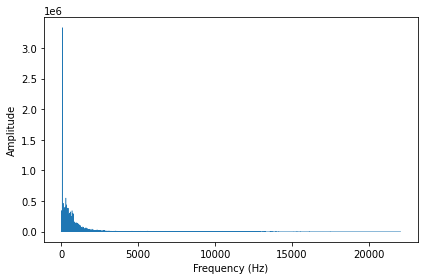

In [3]:
from thinkdsp import decorate
segment1 = wave1.segment(start=0, duration=5)
segment1.make_audio()
spectrum1 = segment1.make_spectrum()
spectrum1.plot_power(linewidth=0.5)
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Поскольку почти вся мощность сосредоточена на низких частотах, то для того чтобы увидеть вид спектра более чётко, необходимо вывести мощность и частоту в двойном логарифмическом масштабе.

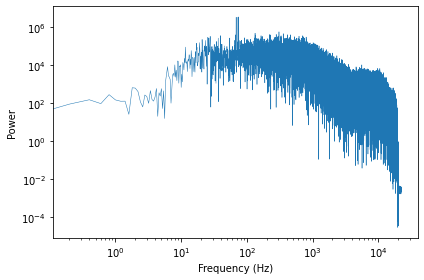

In [4]:
spectrum1.hs[0] = 0
spectrum1.plot_power(linewidth=0.5)
loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)', ylabel='Power', **loglog)

Спектр мощности для первого сигнала похож на розовый шум.

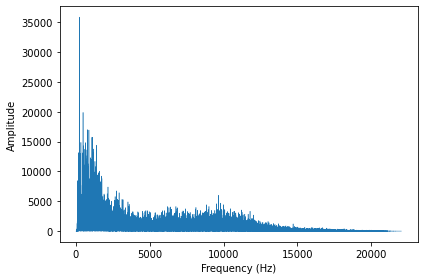

In [5]:
segment2 = wave2.segment(start=0, duration=5)
segment2.make_audio()
spectrum2 = segment2.make_spectrum()
spectrum2.plot_power(linewidth=0.5)
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

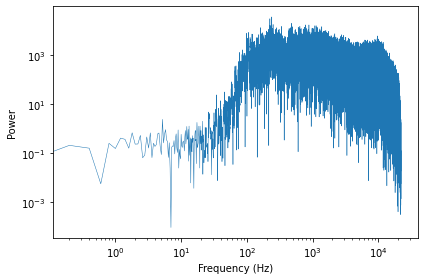

In [6]:
spectrum2.hs[0] = 0
spectrum2.plot_power(linewidth=0.5)
loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)', ylabel='Power', **loglog)

Спектр мощности для второго сигнала ближе к белому шум.

# Упражнение 4.2

Был создан метод barlett_method, который берёт сигнал, разделяет его на сегменты и вычисляет спектр мощности для каждого сегмента, чтобы затем найти среднее по сегментам.

Для этого в качестве аргументов передаём сам сигнал и желаемую длину каждого сегмента. Затем была вычислена спектрограмма из которой были выделены отдельные спекрты spectrums. Из каждого полученного спектра был выделен массив мощностей psds. Была вычислена среднеквадратичная мощность мощность hs. Результаты передаются в объект Spectrum, таким образом метод Барлетта вернёт спектр мощности шумового сигнала.

In [7]:
from thinkdsp import Spectrum
import numpy as np
def bartlett_method(wave, seg_length=512, win_flag=True):
    spectrogram = wave.make_spectrogram(seg_length, win_flag)
    spectrums = spectrogram.spec_map.values()
    psds = [spectrum.power for spectrum in spectrums]
    hs = np.sqrt(sum(psds) / len(psds))
    fs = next(iter(spectrums)).fs
    spectrum = Spectrum(hs, fs, wave.framerate)
    return spectrum

По сути мы таким образом вычисляем Power Spectral Density (PSD) сигнала, которая представляет мощность сигнала как функцию от частоты.

Протестируем функцию на сигналах из Упражнения 4.1:

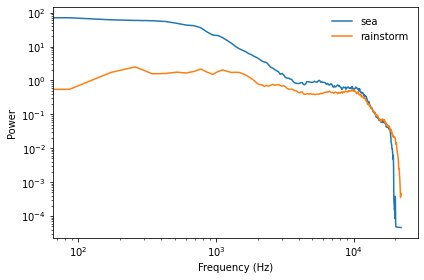

In [8]:
psd1 = bartlett_method(segment1)
psd2 = bartlett_method(segment2)
psd1.plot_power(label='sea')
psd2.plot_power(label='rainstorm')
decorate(xlabel='Frequency (Hz)', ylabel='Power', **loglog)

Теперь зависимость между мощностью и частой видна более четко. Можно сделать первый график более похож на линейную зависимость, чем второй. Что вполне логично, так как первый сигнал был в большей степени похож на броуновский шум, чем второй.

# Упражнение 4.3

Был скачан CSV-файл, содержащий исторические данные о ежедневной цене биткоина за год.

In [9]:
!wget -O BTC.csv https://github.com/BozhkoAV/ThinkDSP/blob/master/code/BTC_USD_2020-07-17_2021-07-16-CoinDesk.csv?raw=true

--2022-05-23 06:04:57--  https://github.com/BozhkoAV/ThinkDSP/blob/master/code/BTC_USD_2020-07-17_2021-07-16-CoinDesk.csv?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/BozhkoAV/ThinkDSP/raw/master/code/BTC_USD_2020-07-17_2021-07-16-CoinDesk.csv [following]
--2022-05-23 06:04:58--  https://github.com/BozhkoAV/ThinkDSP/raw/master/code/BTC_USD_2020-07-17_2021-07-16-CoinDesk.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/BozhkoAV/ThinkDSP/master/code/BTC_USD_2020-07-17_2021-07-16-CoinDesk.csv [following]
--2022-05-23 06:04:58--  https://raw.githubusercontent.com/BozhkoAV/ThinkDSP/master/code/BTC_USD_2020-07-17_2021-07-16-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 1

In [10]:
import pandas as pd
df = pd.read_csv('BTC.csv',  parse_dates=[0])
df

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2020-07-17,9160.410591,9132.454747,9186.961790,9085.977619
1,BTC,2020-07-18,9176.686390,9159.369281,9212.520944,9130.022301
2,BTC,2020-07-19,9190.271534,9182.914419,9197.726524,9117.058699
3,BTC,2020-07-20,9172.588333,9213.358566,9223.076520,9152.280649
4,BTC,2020-07-21,9395.064446,9166.298231,9445.579319,9159.972579
...,...,...,...,...,...,...
360,BTC,2021-07-12,33032.377732,34252.204781,34653.226364,32654.481960
361,BTC,2021-07-13,32544.844908,33088.125767,33334.103032,32206.600517
362,BTC,2021-07-14,33003.812922,32724.856210,33104.154400,31620.150444
363,BTC,2021-07-15,31783.171349,32830.920126,33182.027657,31189.554242


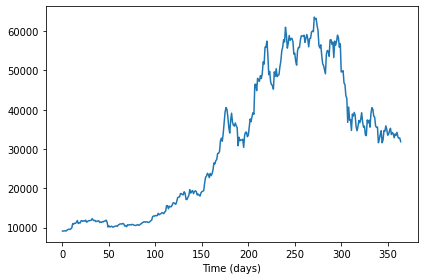

In [11]:
from thinkdsp import Wave
ys = df['24h Open (USD)']
ts = df.index
wave = Wave(ys, ts, framerate=1)
wave.plot()
decorate(xlabel='Time (days)')

Был вычислен спектр цен BitCoin как функция времени.

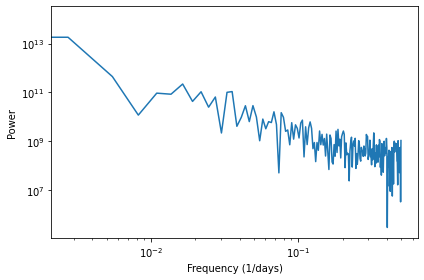

In [12]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (1/days)', ylabel='Power', **loglog)

In [13]:
spectrum.estimate_slope()[0]

-1.7833455116811168

Для броуновского (красного) шума уклон (slope) спектра мощности равен -2.

Полученный уклон ближе к -1.8 нежели чем к -2, так что сложно сказать стоит ли его отнести к красному или к розовому шуму.

# Упражнение 4.4

Счетчик Гейгера — прибор для обнаружения радиации. Когда ионизирующие частицы попадают в детектор, на его выходе появляются импульсы тока. Общий выход в определенный момент времени можно смоделировать некоррелированным пуассоновым шумом (UP), где каждая выборка есть случайное число из распределения Пуассона, соответствующее количеству частиц, обнаруженных за интервал измерения.


Был написан класс UncorrelatedPoissonNoise, наследующий thinkdsp._Noise и предоставляющий метод evaluate.

In [14]:
from thinkdsp import Noise
class UncorrelatedPoissonNoise(Noise):
    def evaluate(self, ts):
        ys = np.random.poisson(self.amp, len(ts))
        return ys

Был использован np.random.poisson для генерации случайных величин из распределения Пуассона. Параметр этой функции lam — это среднее число частиц за время каждого интервала. Для определения lam был использован атрибут amp.


При частоте кадров 10 кГц и amp = 0,001 получится около 10 «щелчков» в секунду

In [15]:
signal1 = UncorrelatedPoissonNoise(amp=0.001)
wave1 = signal1.make_wave(duration=2, framerate=10000)
wave1.make_audio()

Для малых значений amp, например 0,001, звук был как у счетчика Гейгера.


In [16]:
signal2 = UncorrelatedPoissonNoise(amp=1)
wave2 = signal2.make_wave(duration=2, framerate=10000)
wave2.make_audio()

При больших значениях звук похож на белый шум. Данное утверждение можно подтвердить, вычислив и напечатав спектр мощности.

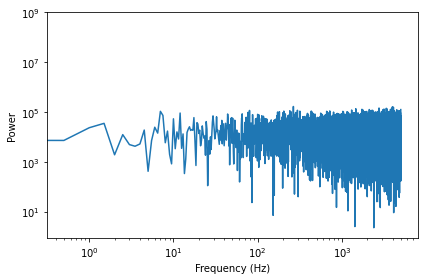

In [17]:
spectrum = wave2.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)', ylabel='Power', **loglog)

Полученный уклон близок к 0, так что можно уверенно отнести сигнал к белому шуму.

In [18]:
spectrum.estimate_slope().slope

0.0018704482694153026

# Упражнение 4.5

Был разработан более эффективный алгоритм для генерации розового шума - алгоритм Voss—McCartney.
 


In [19]:
def voss(nrows, ncols=16):
    array = np.empty((nrows, ncols))
    array.fill(np.nan)
    array[0, :] = np.random.random(ncols)
    array[:, 0] = np.random.random(nrows)
    
    n = nrows
    cols = np.random.geometric(0.5, n)
    cols[cols >= ncols] = 0
    rows = np.random.randint(nrows, size=n)
    array[rows, cols] = np.random.random(n)

    df = pd.DataFrame(array)
    df.fillna(method='ffill', axis=0, inplace=True)
    total = df.sum(axis=1)

    return total.values

Создаётся массив следующих размеров: по одному ряду на каждую временную отметку (timestep) и по одному столбцу на каждый источник белого шума.

Изначально, первый ряд и первый столбец массива заполняются случайными значениями, а все остальные ячейки равны nan.

Следующий шаг - выбор ячеек, в которых случайным образом будут генерироваться значения. Если количество строк равно $n$, количество изменений в первом столбце равно $n$, количество во втором столбце в среднем равно $n/2$, количество в третьем столбце в среднем равно $n/4$ и т.д.

Таким образом, общее количество изменений в матрице в среднем составляет $2n$; и поскольку $n$ из них находятся в первом столбце, то остальные $n$ находятся в остальной части матрицы.

Чтобы разместить оставшиеся изменения в размере $n$, мы генерируем случайные номера столбцов из геометрического распределения с $p=0.5$. Если мы генерируем значение за пределами границ, мы устанавливаем его равным 0 (таким образом, первый столбец получает дополнительные данные).

Внутри каждого столбца мы выбираем случайную строку из равномерного распределения. После этого мы помещаем в эти ячейки случайные значения.

Далее правильная организация массива обеспечивается с помощью DataFrame из Pandas. С помощью метода fillna заполняются все ячейки. Мы получяем суммарные значения для каждого ряда, которые передаются в объект Wave.

Таким образом генерируется розовый шум.

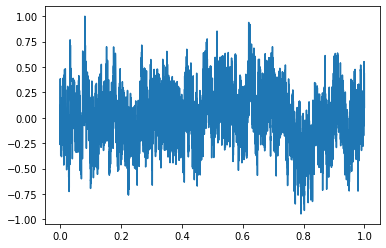

In [20]:
ys = voss(11025)
wave = Wave(ys)
wave.unbias()
wave.normalize()
wave.plot()
wave.make_audio()

Был вычислен спектр результата.

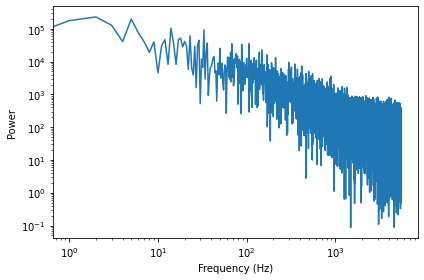

In [21]:
spectrum = wave.make_spectrum()
spectrum.hs[0] = 0
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)', ylabel='Power', **loglog)

Значение уклона позволяет убедиться в том, что был сгенерирован розовый шум.

In [22]:
spectrum.estimate_slope().slope

-1.0143973942721969